## <p style="text-align: right;"> &#9989; Brett Geunes</p>

# CMSE 202: Quiz 5 (Section 002 - Spring 2021)

1. You are encouraged to look through the entire quiz before you get started so that you can appropriately budget your time and understand the broad goals of the exam.

2. The quiz is set up so that even if you get stuck on one question there are opportunities to get points on the other questions, so consider jumping ahead if you feel like you aren't making progress and then come back later if you have time.

3. **Do as much as you can!** Even if your code cannot completely function, you will get partial credits according to the completeness. Provide proper documentation to the code to let the reader understand your intent, especially when your code is not functioning.

3. **Important note about using online resources**: This exam is "open internet". That means that you can look up documentation, google how to accomplish certain Python tasks, etc. Being able to effectively use the internet for computational modeling and data science is a very important skill, so we want to make sure you have the opportunity to exercise that skill. **However, the use of any person-to-person communication software is absolutely not acceptable.**

4. **Do your own work.** This quiz is designed to give *you* the opportunity to show the instructor what you can do and you should hold yourself accountable for maintaining a high level of academic integrity. Any violation of academic integrity could result in you receiving a zero on the quiz.

5. The goal of this quiz is to give you the opportunity to test out some of the skills that you've developed thus far this semester. In particular, you'll reflect on what you know about writing code using Python and showcase some of your new programming skills.

---
# Academic integrity statement


As a member of the MSU Community, I hold myself to the Spartan Code of Honor academic pledge, which states:

> As a Spartan, I will strive to uphold values of the highest ethical standard.  I will practice honesty in my work, foster honesty in my peers, and take pride in knowing that honor is worth more than grades.  I will carry these values beyond my time as a student at Michigan State University, continuing the endeavor to build personal integrity in all that I do.

By typing my name in the cell below, I agree to hold myself to a high degree of academic integrity and ensure that all of the work included in this notebook is my own.

<font size=6 color="#009600">&#9998;</font> Brett Geunes

---
### Load modules
Take a look of what packages will be used in this quiz.

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.svm import SVC

import numpy as np

import networkx as nx

---
### Task 1 (1pt). Download data using `curl` command
**Use `curl` command to download the iris data from** 

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S21-student/master/data/iris.data` 



<font color='red'>***If you cannot use curl command, using other methods download the data so that you can continue the rest of quiz. However, you will lose 1 pt.***</font>

In [2]:
### Put your code here.
!curl -O https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S21-student/master/data/iris.data


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4551  100  4551    0     0   138k      0 --:--:-- --:--:-- --:--:--  138k


---
### Task 2 (2 pt). Use pandas to examine the data
**Use pandas to read the data, and set the five columns to the names:**

`sepal_l`, `sepal_w`, `petal_l`, `petal_w`, `species`

***Hint: Day06***

<font color='red'>***Even if you cannot successfully read in data, provide your code in Tasks 3, 4, and 5 to get your points***</font>

In [4]:
### Your code here

df = pd.read_csv("iris.data",  delimiter = ' ', names = ["sepal_l","sepal_w","petal_l","petal_w","species"])

**Use head(  ) function to examine the `first 25` data points.** 

In [38]:
### Your code here
df.head(25)


,sepal_l,sepal_w,petal_l,petal_w,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


**Use describe( ) function to show the mean and other information of the data.**

In [39]:
### Your code here
df.describe()

,sepal_l,sepal_w,petal_l,petal_w
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**What are the mean and median of pedal_l?**

<font size=+3>&#9998;</font> mean: 3.758667 \
median: 4.35

---
### Task 3 (3 pt). Convert data frame to numpy array

**You need to convert the df to array X and y for plotting and classification.** 

1. **Create an `X` array that has the first 4 columns in the Iris data.**
2. **Create a `y` array that has numeric values representing the species.**

- If species = Iris-setosa, the corresponding value is 0 in y. 
- If species = Iris-versicolor, the corresponding value is 1 in y.
- If species = Iris-virginica, the corresponding value is 2 in y.

In [40]:
### Here we create an X and y arrays first, and fill the entries 
### Your code here

X = np.zeros((150 , 4))  ## <== fill the blanks
y = np.zeros(150)      ## <== fill the blanks

### the rest of your code
for i in range(150):
    for j in range(4):
        X[i,j] = df.iloc[i,j]
    if df.iloc[i,4] == "Iris-setosa":
        y[i] = 0
    elif df.iloc[i,4] == "Iris-versicolor":
        y[i] = 1
    else:
        y[i] = 2
print(X)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

---
### Task 4 (1 pt). Use scatter function to plot the data points. petal_l versus sepal_l.

***petal_l (the 3rd column) as the vertical coordinate, and sepal_l (the 1st column) as the horizontal coordinate.*** You should get a plot like the one below.
<img src="https://i.ibb.co/PrSFqPf/Sepal-vs-petal.png" alt="Popula-1" border="0" width=300px>

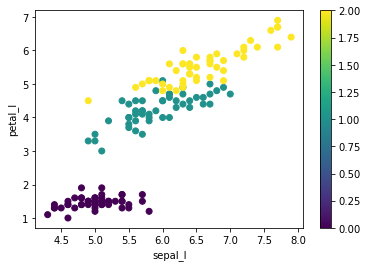

In [47]:
## You code here:
plt.scatter(df["sepal_l"],df["petal_l"], c=y)
plt.xlabel("sepal_l")
plt.ylabel("petal_l")
plt.colorbar()

---
### Task 5 (2 pt): SVM classification.

1. **Create a linear svm classifier.** ***Hint: `svm.SVC` and `linear` kernel***
1. **Use the fit( ) function to fit the classifier with the X and y arrays created earlier.**
1. **Use the predict( ) function to classfy which species of an iris having** 
`sepal_l, sepal_w, petal_l and petal_w = 6.5, 4.0, 2.5, and 10.0`, **respectively.** ***Hint: This data point contains four values [6.5, 4.0, 2.5, 10.0]***

In [56]:
### You code here.
svc = svm.SVC(kernel="linear")
svc.fit(X, y)
svc.predict([6.5, 4.0, 2.5, 10.0])


ValueError: Expected 2D array, got 1D array instead:
array=[ 6.5  4.   2.5 10. ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

**Which species?**

<font size=+3>&#9998;</font> Do This - put your answer here.

---
### Task 6 (2 pt) Object-oriented programming.

You are asked to create a car class that contains two attributes: make and year: `make` is the what model the car is. `year` is how old the car is.

1. **Complete the `init` block.** The class contains make and year attributes that will be keyed in later.
2. **Complete the get_make method, which allows you to find the `make` of the car.**
2. **Complete the get_year method, which allows you to find the `year` of the car.**


**Fill the blanks and complete the code below.**

In [66]:
class Car():
    '''
    class of cars. 
    '''
    def __init__(self, make, year):   
        '''
        This class contains two attributes: make and year.
        '''
        self.make = make
        self.year = year
        
        return
    
    
    def get_make(self):
        '''
        This method returns the make of the car.
        '''      
        print(self.make)
        return 
    
    
    
    def get_year(self):
        '''
        This method returns how old this car is.
        '''        
        print(self.year)
        return  
    

**Create 5 car classes: Toyo1, Suba1, Suba2, Merc1, Chev1.**

In [67]:
Toyo1 = Car('RAV4',5)
Suba1 = Car('Outback',6)
Suba2 = Car('Outback',2)
Merc1 = Car('SLK',10)
Chev1 = Car('Corvette',6)

### Task 7 (1 pt). 

**Use the `get_make` and `get_year` methods to print out the make and year of Merc1 in the cell below**

In [68]:
### Your code here
Merc1.get_make()
Merc1.get_year()

SLK
10


---
### Task 8 (1 pt). Make an adjacency matrix based on the graph in the image below.

<img src="https://i.ibb.co/NZk07qg/NetX.png" alt="Popula-1" border="0" width=500px>

**Note that you should make the adjcancy matrix in a np array.**

In [72]:
### Your adjacency matrix

adj = np.array([[0, 0, 1, 0, 1, 1],
               [0, 0, 1, 1, 0, 1],
                [1, 1, 0, 0, 1, 0],
               [0, 1, 0, 0, 0, 0],
               [1, 0, 1, 0, 0, 0],
               [1, 1, 0, 0, 0, 0]])


---
### Task 9 (1 pt). Create a graph object using networkX and draw the graph.
<font color='red'>***Even if you cannot create the adjacency matrix, provide your code in the cell below to get your points.***</font>

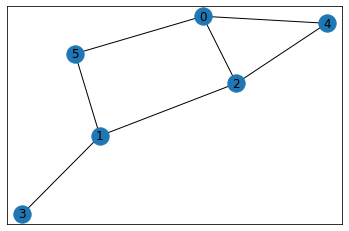

In [74]:
### Your code here
G = nx.Graph(adj)
nx.draw_networkx(G)


---

### Task 10 (1 pt). Use networkX function to find the shortest path from node 3 to 4.
<font color='red'>***Even if you do not have the adjacency matrix and graph object, provide your code in the cell below to get your points.***</font>

In [76]:
### Your code here
nx.shortest_path(G,3,4)


[3, 1, 2, 4]

---
### Task 11 (1 pt): Git practice. 
1. **Create a Qz5 folder on your GitHub and uplaod this notebook file to the folder.**
1. **Provide the git command to clone your file in the cell below.**

In [77]:
### Your code here.
#git clone https://github.com/geunesbr/Qz5

---

### Congratulations, you're done!

Submit this quiz by uploading it to the course Desire2Learn web page.  Go to the "Quizzes" section, find the submission folder link for Quiz #5, and upload it there.